# XOR Prediction Neural Network

In [867]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [868]:
#The training data
X=np.array([
    [0,1],
    [1,0],
    [1,1],
    [0,0]    
])

y=np.array([
    [1],
    [1],
    [0],
    [0]
])

In [869]:
X

array([[0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [870]:
y

array([[1],
       [1],
       [0],
       [0]])

# Additional Parameters

In [871]:
num_i_units=2 #number of Input units
num_h_units=950 #number of Hidden units
num_o_units=1 #number of output units

# Neural Network Parameters

In [872]:
#The learning rate for Gradient Descent
learning_rate=0.32
#the parameter to help with overfitting
reg_param=0
#maximum itérations for Gradient Descent
max_iter=200
#Number of training examples
m=4

# Weights and biases

In [873]:
np.random.seed(1)
W1=np.random.normal(0,1,(num_h_units,num_i_units)) #2x2
W2=np.random.normal(0,1,(num_o_units,num_h_units)) #1x2

B1=np.random.random((num_h_units,1)) #2x1
B2=np.random.random((num_o_units,1)) #1x1

In [874]:
W1

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       ...,
       [-1.99876394,  0.21302573],
       [-0.80454159, -0.64658222],
       [ 1.13817277,  0.29543966]])

In [875]:
W2


array([[ 9.33629628e-01, -1.76377472e+00, -4.10216819e-01,
        -4.53667125e-01, -5.89429671e-01,  4.40234504e-01,
         8.95921481e-01, -1.10677887e+00, -9.62662564e-01,
        -1.25195743e+00,  1.14760667e+00, -5.14734922e-01,
        -1.01380781e-01, -3.32210679e-01, -9.63656585e-01,
         3.73260974e-01,  3.83026870e-01,  9.41325585e-01,
        -2.25420082e-01, -2.97087421e-01, -5.85521747e-01,
         1.48814157e+00,  1.00756699e+00, -4.03852079e-02,
         6.48973606e-01, -5.85843747e-01,  2.05447476e+00,
        -5.91566250e-01, -3.79688955e-01, -3.71031518e-01,
         1.70123497e+00,  1.47602436e-01,  1.08441856e+00,
        -1.10096958e-01, -1.21297497e+00,  7.75480174e-01,
        -6.26456546e-01, -1.31852251e+00, -4.16075544e-01,
         6.31657101e-01,  1.76428506e+00, -1.38747793e+00,
        -2.19905799e+00,  9.30156997e-01,  3.00051259e-01,
        -5.63472911e-01,  4.18361917e-01,  7.29443074e-01,
         1.91206875e+00, -1.30341932e-01,  1.27980017e+0

In [876]:
B1

array([[5.28384697e-01],
       [2.47130826e-01],
       [7.92887930e-01],
       [2.61751044e-01],
       [3.98380055e-04],
       [2.31318919e-01],
       [9.93370289e-01],
       [6.56200834e-01],
       [2.20668122e-01],
       [6.86139702e-01],
       [6.86936898e-01],
       [6.40742770e-01],
       [7.05485167e-02],
       [2.42964117e-01],
       [8.70837193e-01],
       [7.34740819e-01],
       [1.67816006e-01],
       [2.98589461e-01],
       [5.62722029e-01],
       [8.26445766e-01],
       [2.00516306e-01],
       [1.01665294e-01],
       [3.81868890e-01],
       [9.12353469e-01],
       [2.60513519e-01],
       [1.08304353e-01],
       [5.59429653e-02],
       [3.51670556e-01],
       [3.76269453e-02],
       [5.83033921e-01],
       [6.72556810e-01],
       [4.60483590e-01],
       [7.41116854e-01],
       [5.01024964e-01],
       [7.02352621e-01],
       [2.30640906e-01],
       [7.44612409e-01],
       [5.01637202e-01],
       [7.05368830e-01],
       [4.46697790e-01],


In [877]:
B2

array([[0.81433749]])

# Sigmoid Function

In [878]:
def sigmoid(z,derv=False):
    if derv: return z*(1-z)
    return 1/(1+np.exp(-z))

# Forward Propagation

In [879]:
def forward(x,predict=False):
    a1=x.reshape(x.shape[0],1) #Getting the training example as a column vector
    
    z2=W1.dot(a1)+B1 #2x2*2x1+2x1=2x1
    a2=sigmoid(z2) #2x1
    
    z3=W2.dot(a2)+B2 #1x2*2x1+1x1=1x1
    a3=sigmoid(z3)
    
    if predict: return a3
    return(a1,a2,a3)

# Gradients for the Weights and Biases

In [880]:
dW1=0 #Gradient for W1
dW2=0 #gradient for W2

dB1=0 #gradient for B1
dB2=0 #Gradient for B2

cost=np.zeros((max_iter,1)) #column vector to record the cost of the NN after each Gradient Descent itération

# Training

# Backpropagation

In [881]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)

# Running

In [882]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

Iteration: 50 and 4

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_3080/1665295545.py:33: RuntimeWarning: divide by zero encountered in log
  c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_3080/1665295545.py:33: RuntimeWarning: invalid value encountered in multiply
  c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))


Iteration: 200 and 4

In [883]:
W1

array([[ 1.43701758, -0.36996315],
       [-1.42971194, -1.69669579],
       [ 0.98204345, -2.23896511],
       ...,
       [-2.16127087,  0.26544634],
       [-0.84609043, -0.72241229],
       [ 1.06255033,  0.08190164]])

In [884]:
W2

array([[ 6.91150661e-01, -2.05640039e+00, -4.39012725e-01,
        -7.53069045e-01, -4.98893392e-01,  8.59188048e-01,
         8.84764486e-01, -1.43237482e+00, -9.12323136e-01,
        -1.15484394e+00,  9.40437600e-01, -3.47548628e-01,
        -8.22670452e-02, -2.95660983e-01, -9.39547430e-01,
         3.84266776e-01,  2.59346079e-01,  8.66122354e-01,
        -1.82044376e-01,  7.94676564e-02, -5.55013299e-01,
         1.33560441e+00,  9.35294305e-01,  8.35476349e-02,
         6.21867841e-01, -4.94830050e-01,  1.87930079e+00,
        -5.47484209e-01, -1.68608254e-01, -2.76717581e-01,
         1.41702935e+00,  1.32911422e-01,  1.02668079e+00,
         4.52925296e-01, -2.18683071e+00,  6.24467555e-01,
        -5.61998597e-01, -1.13963986e+00, -4.67417999e-01,
         6.71534465e-01,  1.60914098e+00, -1.22020612e+00,
        -1.96049386e+00,  8.73149516e-01,  3.20686368e-01,
        -4.85686079e-01,  4.10671352e-01,  6.87094232e-01,
         1.72526103e+00, -2.16595535e-01,  1.15375996e+0

In [885]:
B1

array([[ 2.83057879e-01],
       [-1.05349430e-01],
       [ 9.28159589e-01],
       [ 3.20881410e-01],
       [-1.37073068e-01],
       [-3.28462123e-01],
       [ 8.95834186e-01],
       [ 9.27196946e-01],
       [-1.24571253e-02],
       [ 5.49225969e-01],
       [ 1.51608505e-01],
       [ 4.61757370e-01],
       [-6.18036048e-02],
       [ 9.98169823e-02],
       [ 7.45797710e-01],
       [ 6.37354344e-01],
       [ 1.29451593e-01],
       [ 1.66830491e-01],
       [ 4.32979803e-01],
       [ 7.03488029e-01],
       [ 2.38580542e-02],
       [-6.22493702e-01],
       [ 2.33430051e-01],
       [ 7.81304808e-01],
       [ 1.19688359e-01],
       [-2.62917420e-02],
       [-3.55983017e-02],
       [ 2.08353190e-01],
       [-1.75932575e-01],
       [ 3.99239260e-01],
       [ 3.43342389e-01],
       [ 2.73748372e-01],
       [ 6.07248022e-01],
       [ 3.45266571e-01],
       [ 1.14137414e+00],
       [ 2.44183419e-01],
       [ 5.72101933e-01],
       [ 4.87754842e-01],
       [ 5.5

In [886]:
B2

array([[0.85531038]])

# Plotting

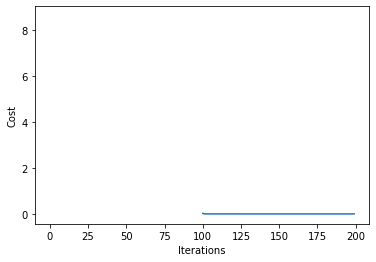

In [887]:
# Assigning the axes to the different elements.
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

In [888]:
forward(np.array(
    [0,1]   
),predict=True)

array([[0.9999981]])

In [889]:
forward(np.array(
    [1,0]   
),predict=True)

array([[0.99867354]])

In [890]:
forward(np.array(
    [1,1]   
),predict=True)

array([[0.00129109]])

In [891]:
forward(np.array(
    [0,0]   
),predict=True)

array([[2.65159561e-16]])